In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)['frame']

In [ ]:
df.to_csv('california_housing', sep=',', index=False, encoding='utf-8')

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# 1.Направете основен експлораторен анализ като вземете дескриптивни статистики. Проверете какви са типовете на данните във всяка колона.

df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [ ]:
df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]>

In [ ]:
df.shape

(20640, 9)

In [ ]:
# 2. Каква е медианата на променливата AveBedrms, където променливата HouseAge е равна на 30?

filtered_data = df[df['HouseAge'] == 30]

In [ ]:
filtered_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
129,6.0666,30.0,6.446064,1.008746,844.0,2.460641,37.84,-122.20,3.115
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.833
187,1.8854,30.0,3.798479,1.003802,1011.0,3.844106,37.79,-122.23,1.375
208,1.6198,30.0,4.357143,1.035714,425.0,3.035714,37.79,-122.23,1.227
285,2.8750,30.0,4.731152,1.061166,1704.0,2.423898,37.77,-122.17,1.353


In [ ]:
filtered_data.shape

(476, 9)

In [ ]:
median_ave_bedrms = filtered_data['AveBedrms'].median()

median_ave_bedrms

1.0502678545986455

#3. Проверете корелация на Pearson и на Spearman между MedHouseVal и останалите променливи (може да го направите в loop, за по-бързо). Изведете и значимост на корелациите.


In [ ]:
correlation_results = []

In [ ]:
target = 'MedHouseVal'

In [ ]:
for column in df.columns:
    if column != target:

        pearson_corr, pearson_p = pearsonr(df[column], df[target])
        spearman_corr, spearman_p = spearmanr(df[column], df[target])

        correlation_results.append({
            "Variable": column,
            "Pearson Correlation": pearson_corr,
            "Pearson P-value": pearson_p,
            "Spearman Correlation": spearman_corr,
            "Spearman P-value": spearman_p
        })

correlation_results_df = pd.DataFrame(correlation_results)
correlation_results_df.sort_values(by="Pearson Correlation", ascending=False)


,Variable,Pearson Correlation,Pearson P-value,Spearman Correlation,Spearman P-value
0,MedInc,0.688075,0.000000e+00,0.676778,0.000000e+00
2,AveRooms,0.151948,7.569242e-107,0.263367,0.000000e+00
1,HouseAge,0.105623,2.761861e-52,0.074855,4.844329e-27
5,AveOccup,-0.023737,6.483442e-04,-0.256594,1.289394e-307
4,Population,-0.024650,3.976308e-04,0.003839,5.813127e-01
7,Longitude,-0.045967,3.923322e-11,-0.069667,1.241002e-23
3,AveBedrms,-0.046701,1.912589e-11,-0.125187,7.188442e-73
6,Latitude,-0.144160,2.939859e-96,-0.165739,4.994632e-127


4. Направете хистограма на MedHouseVal. Кога използваме хистограма и кога колонна диаграмa (bar chart)?

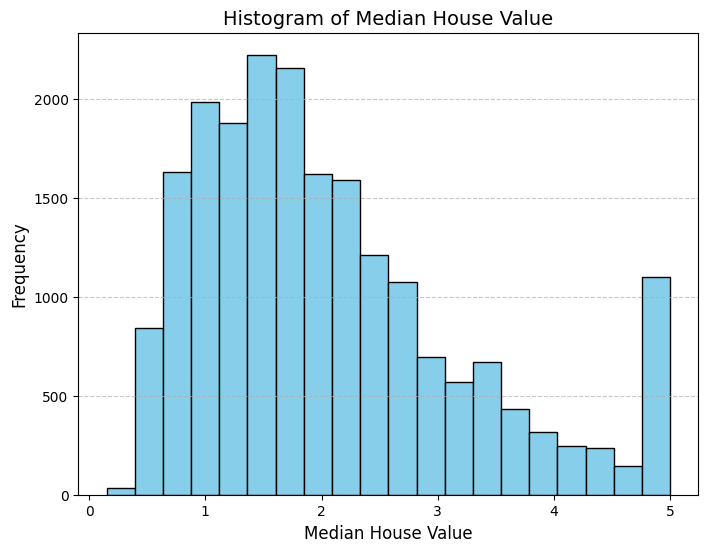

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['MedHouseVal'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Median House Value', fontsize=14)
plt.xlabel('Median House Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


5. Разделете данните на тренингови и тестови, като не забравяте да зададете random_state по ваш избор, за да могат резултатите ви да бъдат репродуцирани.


In [ ]:
#Целева променлива (MedHouseVal) и характеристики
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Разделяме данните на тренировъчен и тестови набор (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Потвърждаваме размерите на новите набори
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

6. Направете линеен модел с избрана от вас библиотека.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.5291402345397312, 0.596596837481235)

7.Какво означава коефициент на детерминация? Какъв е коефициентът на детерминация на модела? Колко е MSE върху тренинговите и върху тестовите данни?